# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов двух тарифов - smart и ultra. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Нужно построить модель с максимально большим значением *accuracy*.

## Описание данных

- calls — количество звонков;
- minutes — суммарная длительность звонков в минутах;
- messages — количество sms-сообщений;
- mb_used — израсходованный интернет-трафик в Мб;
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Загрузка данных

### Импортируем библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score



### Загружаем и проверяем датасет

In [4]:
df = pd.read_csv('users_behavior.csv')
display(df.head())
df.info

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<bound method DataFrame.info of       calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]>

## Разделение данных на выборки

Признаки - все, кроме is_ultra.

Целевой признак - is_ultra.

Нам требуется разбить данные на 3 выборки, тренировочную, валидационную и тестовую, в соотношении 3:1:1. Для этого сначала выделим тренировочную выборку и временную выборку temp, из которой потом получим валидационную и тестовую.

In [5]:
# задаем признаки и целевой признак
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

# разбиваем данные на тренировочную и временную выборки
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345)

# из временной выборки получаем валидационную и тестовую
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

# задаем признаки и целевые признаки для полученных выборок
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

### Проверяем размер выборок

In [6]:
print('Размер датасета:', df.shape)
print('Размер тренировочной выборки:', df_train.shape)
print('Размер валидационной выборки:', df_valid.shape)
print('Размер тестовой выборки:', df_test.shape)

Размер датасета: (3214, 5)
Размер тренировочной выборки: (1928, 5)
Размер валидационной выборки: (643, 5)
Размер тестовой выборки: (643, 5)


## Исследуем модели

### Решающее дерево

#### max_depth

Определяет максимальную глубину дерева.


Accuracy лучшей модели решающего дерева на валидационной выборке: 78.54 %


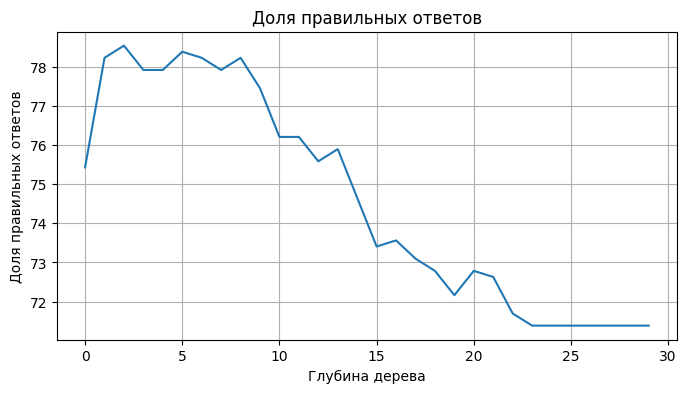

In [7]:
best_model_decision_tree = None
best_result_decision_tree = 0
acc_list = []
for depth in range(1, 31):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    result = model_tree.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_decision_tree:
        best_model_decision_tree = model_tree
        best_result_decision_tree = result
print()
print('Accuracy лучшей модели решающего дерева на валидационной выборке:', round(best_result_decision_tree*100, 2),'%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='Глубина дерева', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

Видим, что максимальная доля правильных ответов достигается уже при глубине дерева 2, после чего какое-то время держится на приемлемом уровне. При увеличении глубины больше 9-10, точность начинает резко падать.

При выборе этой модели, оптимально перебирать гиперпараметр глубины в диапазоне от 1 до 10.

#### min_samples_split

Определят минимальное количество объектов для создания нового узла дерева.


Accuracy лучшей модели решающего дерева на валидационной выборке: 76.21 %


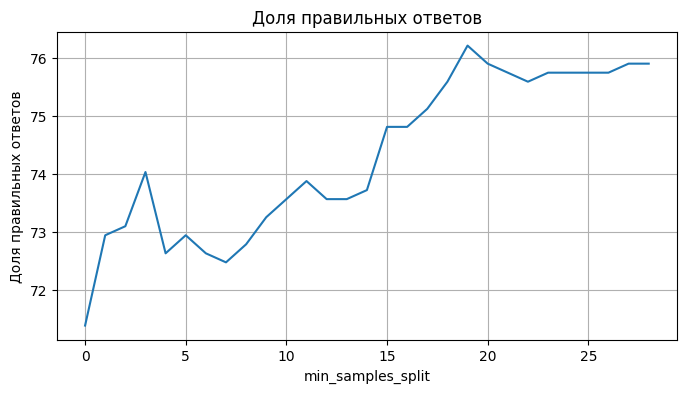

In [8]:
best_model_decision_tree = None
best_result_decision_tree = 0
acc_list = []
for samples in range(2, 31):
    model_tree = DecisionTreeClassifier(random_state=12345, min_samples_split=samples)
    model_tree.fit(features_train, target_train)
    result = model_tree.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_decision_tree:
        best_model_decision_tree = model_tree
        best_result_decision_tree = result
print()
print('Accuracy лучшей модели решающего дерева на валидационной выборке:', round(best_result_decision_tree*100, 2),'%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='min_samples_split', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

Максимальная доля правильных ответов достигается при количестве объектов 19.

#### min_samples_leaf
Определяет минимальное количество объектов для создания листа.


Accuracy лучшей модели решающего дерева на валидационной выборке: 78.23 %


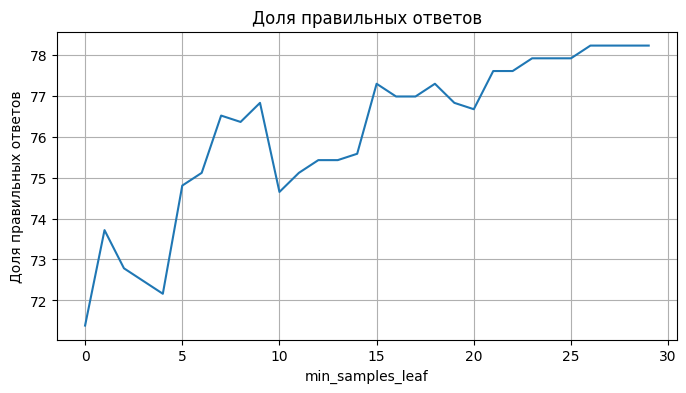

In [9]:
best_model_decision_tree = None
best_result_decision_tree = 0
acc_list = []
for samples in range(1, 31):
    model_tree = DecisionTreeClassifier(random_state=12345, min_samples_leaf=samples)
    model_tree.fit(features_train, target_train)
    result = model_tree.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_decision_tree:
        best_model_decision_tree = model_tree
        best_result_decision_tree = result
print()
print('Accuracy лучшей модели решающего дерева на валидационной выборке:', round(best_result_decision_tree*100, 2),'%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='min_samples_leaf', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

Максимальная доля правильных ответов достигается при количестве объектов 26.

#### Комбинация гиперпараметров
Подберем лучшую модель с комбинацией этих гиперпараметров.

In [10]:
best_model_decision_tree = None
best_result_decision_tree = 0
for depth in range(1, 11):
    for samples_split in range(2, 21):
        for samples_leaf in range(1, 21):
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth,\
                                               min_samples_split=samples_split, min_samples_leaf=samples_leaf)
            model_tree.fit(features_train, target_train)
            result = model_tree.score(features_valid, target_valid)
            if result > best_result_decision_tree:
                best_model_decision_tree = model_tree
                best_result_decision_tree = result
print('Accuracy наилучшей модели решающего дерева на валидационной выборке:', round(best_result_decision_tree*100, 2),'%')

Accuracy наилучшей модели решающего дерева на валидационной выборке: 79.0 %


При различных комбинациях гиперпараметров удалось достичь 79% правильных ответов.

### Случайный лес

#### n_estimators

Количество деревьев.

Accuracy лучшей модели случайного леса на валидационной выборке: 79.47 %


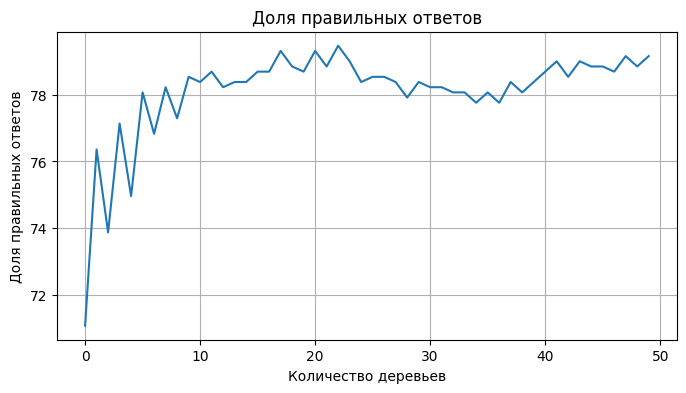

In [11]:
best_model_rnd_forest = None
best_result_rnd_forest = 0
acc_list = []
for est in range(1, 51):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model_forest.fit(features_train, target_train) 
    result = model_forest.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_rnd_forest:
        best_model_rnd_forest = model_forest
        best_result_rnd_forest = result
print('Accuracy лучшей модели случайного леса на валидационной выборке:', round(best_result_rnd_forest*100, 2), '%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='Количество деревьев', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

Видим, что с увеличением числа деревьев, точность модели растет и достигает максимальных значений при числе деревьев от 18 до 25. При выборе этой модели, оптимально перебирать гиперпараметр числа деревьер от 1 до 30.

#### max_depth

Рассмотрим влияние глубины дерева на случайный лес.

Accuracy лучшей модели случайного леса на валидационной выборке: 80.09 %


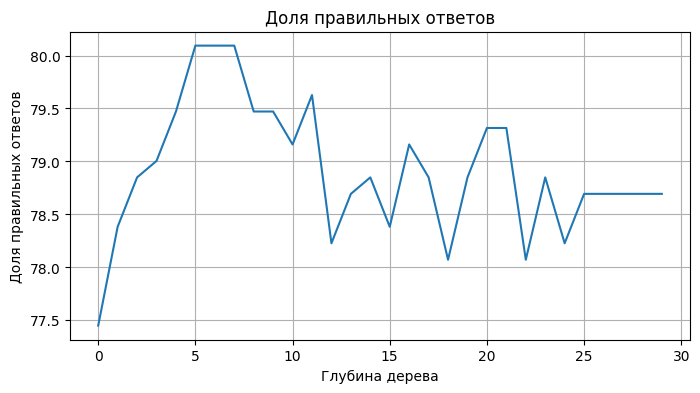

In [12]:
best_model_rnd_forest = None
best_result_rnd_forest = 0
acc_list = []
for depth in range(1, 31):
    model_forest = RandomForestClassifier(random_state=12345, max_depth=depth) 
    model_forest.fit(features_train, target_train) 
    result = model_forest.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_rnd_forest:
        best_model_rnd_forest = model_forest
        best_result_rnd_forest = result
print('Accuracy лучшей модели случайного леса на валидационной выборке:', round(best_result_rnd_forest*100, 2), '%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='Глубина дерева', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

Как и в случае с деревом решений, доля правильных ответов снижается после значения глубины 11.

#### min_samples_split

Определят минимальное количество объектов для создания нового узла дерева.

Accuracy лучшей модели случайного леса на валидационной выборке: 79.47 %


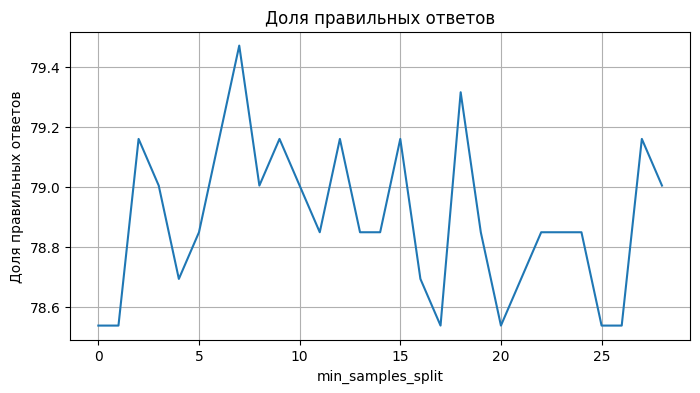

In [13]:
best_model_rnd_forest = None
best_result_rnd_forest = 0
acc_list = []
for sample in range(2, 31):
    model_forest = RandomForestClassifier(random_state=12345, min_samples_split=sample) 
    model_forest.fit(features_train, target_train) 
    result = model_forest.score(features_valid, target_valid)
    acc_list.append(result*100)
    if result > best_result_rnd_forest:
        best_model_rnd_forest = model_forest
        best_result_rnd_forest = result
print('Accuracy лучшей модели случайного леса на валидационной выборке:', round(best_result_rnd_forest*100, 2), '%')

acc_series = pd.Series(acc_list)
acc_series.plot(title='Доля правильных ответов', xlabel='min_samples_split', ylabel='Доля правильных ответов',\
                figsize=(8, 4), grid=True);

#### Комбинация гиперпараметров
Подберем лучшую модель с комбинацией этих гиперпараметров.

In [14]:
best_model_rnd_forest = None
best_result_rnd_forest = 0
for est in range(1, 26):
    for depth in range(1, 11):
        for samples in range (2, 11):
            model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                                 min_samples_split=samples) 
            model_forest.fit(features_train, target_train) 
            result = model_forest.score(features_valid, target_valid)
            if result > best_result_rnd_forest:
                best_model_rnd_forest = model_forest
                best_result_rnd_forest = result
print('Accuracy наилучшей модели случайного леса на валидационной выборке:', round(best_result_rnd_forest*100, 2), '%')

Accuracy наилучшей модели случайного леса на валидационной выборке: 81.03 %


При различных комбинациях гиперпараметров удалось достичь 81.03% правильных ответов.

### Логистическая регрессия

Будем перебирать гиперпараметр solver - алгоритма построения модели.

Алгоритм - lbfgs точность - 71.07 %
Алгоритм - liblinear точность - 75.89 %
Алгоритм - newton-cg точность - 75.58 %
Алгоритм - sag точность - 70.61 %
Алгоритм - saga точность - 70.45 %

Accuracy наилучшей модели логистической регрессии на валидационной выборке: 75.89 %


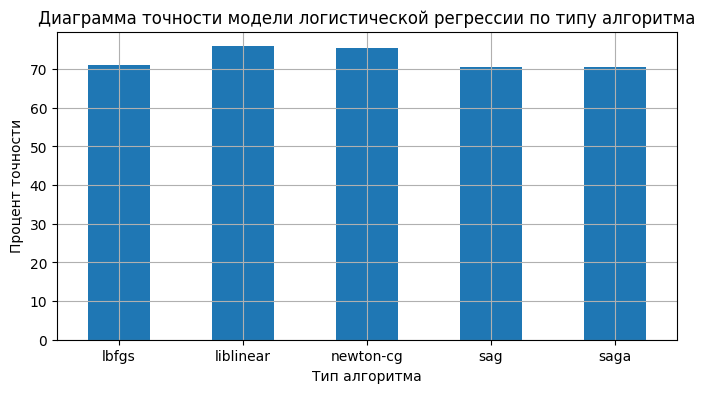

In [15]:
best_model_log_regr = None
best_result_log_regr = 0

warnings.filterwarnings('ignore')

acc_dict = {'lbfgs': 0, 
            'liblinear': 0,
            'newton-cg': 0,
            'sag': 0,
            'saga': 0
           }
for alg in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    model_logreg = LogisticRegression(random_state=12345, solver=alg, max_iter=2000)
    model_logreg.fit(features_train, target_train) 
    result = model_logreg.score(features_valid, target_valid)
    print('Алгоритм -', alg, 'точность -', round(result*100, 2), '%')
    acc_dict[alg] = result*100
    if result > best_result_log_regr:
        best_model_log_regr = model_logreg
        best_result_log_regr = result
print()
print('Accuracy наилучшей модели логистической регрессии на валидационной выборке:', round(best_result_log_regr*100, 2), '%')

acc_series = pd.Series(acc_dict)
acc_series.plot(kind='bar', title='Диаграмма точности модели логистической регрессии по типу алгоритма', \
                xlabel='Тип алгоритма', ylabel='Процент точности', figsize=(8, 4), grid=True)
plt.xticks(rotation=0);

Для нашей выборки лучшим алгоритмом в логистической регрессии оказался liblinear. Newton-cg показывает почти такие же результаты, остальные заметно уступают.

### Промежуточный вывод

У нас небольшой объем данных, поэтому решения задачи лучше всего подходит модель случайного леса, она показывает наибольшую долю правильных ответом 81.03% . Затем дерево решений - 79%. Завершает тройку модель логистической регрессии с алгоритмом liblinear - точность 75.89%.

## Проверим модель на тестовой выборке

Проверим результаты лучших моделей каждого типа на тестовой выборке.

### Решающее дерево

In [16]:
best_model_decision_tree.fit(features_train, target_train)
test_predictions_tree = best_model_decision_tree.predict(features_test)

print('Доля правильных ответов на тестовой выборке', round(accuracy_score(target_test, test_predictions_tree)*100, 2), '%')

Доля правильных ответов на тестовой выборке 77.6 %


### Случайный лес

In [17]:
best_model_rnd_forest.fit(features_train, target_train)
test_predictions_forest = best_model_rnd_forest.predict(features_test)

print('Доля правильных ответов на тестовой выборке', round(accuracy_score(target_test, test_predictions_forest)*100, 2), '%')

Доля правильных ответов на тестовой выборке 79.0 %


### Логистическая регрессия

In [18]:
best_model_log_regr.fit(features_train, target_train)
test_predictions_log_regr = best_model_log_regr.predict(features_test)

print('Доля правильных ответов на тестовой выборке', round(accuracy_score(target_test, test_predictions_log_regr)*100, 2), '%')

Доля правильных ответов на тестовой выборке 74.03 %


## Проверим модели на адекватность

При проверке на адекватность, используем DummyClassifier для создания фиктивной модели, которая всегда будет предсказывать наиболее часто встречающийся класс.

In [19]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)

print('Accuracy dummy: ', round(accuracy_score(target_test, dummy_pred)*100, 2), '%')
print('Accuracy decision tree: ', round(accuracy_score(target_test, test_predictions_tree)*100, 2), '%')
print('Accuracy random forest: ', round(accuracy_score(target_test, test_predictions_forest)*100, 2), '%')
print('Accuracy logistic regression: ', round(accuracy_score(target_test, test_predictions_log_regr)*100, 2), '%')

Accuracy dummy:  68.43 %
Accuracy decision tree:  77.6 %
Accuracy random forest:  79.0 %
Accuracy logistic regression:  74.03 %


Доля правильных ответов у наших моделей выше, все они успешно проходят проверку на адекватность.

## Вывод

Мы провели сравнительный анализ моделей для решения задачи классификации. По входным данным нам необходимо было обучить модель, которая будет предсказывать подходящий тариф для клиентов оператора мобильной связи.

Разделив данные на обучающую, валидационную и тестовую выборки, в соотношении 3:1:1 мы приступили к исследованию моделей.

При исследовании **решающего дерева** мы изменяли гиперпараметры глубины, количества объектов для создания новых узлов и листов. Доля правильных ответов наилучшей модели на валидационной выборке - 79%  На тестовой выборке - 77.6%

При исследовании **случайного леса** мы изменяли гиперпараметр количества деревьев, глубины деревьев и количества объектов для создания новых узлов. Доля правильных ответов наилучшей модели на валидационной выборке - 81.03%. На тестовой выборке - 79%.

При исследовании **логистической регрессии** мы изменяли гиперпараметр solver - алгоритм построения модели. Точность наилучшей модели на валидационной выборке - 75.89%. Точность на тестовой выборке - 74.03%.

Лучше всего показала себя модель случайного леса.